In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/laptop_prices .csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

In [3]:
df.head(10)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
5,Acer,AMD Ryzen 3,64,2TB SSD,Nvidia RTX 3060,14.0,1366x768,7.1,1.85,Linux,1676.64
6,Dell,Intel i5,8,1TB SSD,Nvidia RTX 2060,15.6,2560x1440,9.1,1.98,Windows,1449.05
7,Microsoft,AMD Ryzen 9,8,1TB SSD,Nvidia RTX 3080,17.3,2560x1440,9.8,1.26,Linux,2193.55
8,Apple,Intel i5,64,256GB SSD,Nvidia RTX 2060,15.6,3840x2160,11.5,1.48,Linux,6409.03
9,HP,AMD Ryzen 5,4,1TB SSD,AMD Radeon RX 6800,14.0,3840x2160,7.5,2.19,FreeDOS,1556.72


In [5]:
# Check for missing values
df.isnull().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


In [6]:
# Remove duplicate rows
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [8]:
# Save the cleaned dataset before encoding for Power BI
df.to_csv("laptop_data_cleaned_for_powerbi.csv", index=False)


In [9]:
import pandas as pd

# Apply One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=["Brand", "Processor", "Operating System", "GPU", "Storage"], drop_first=True)

# Save the encoded dataset for ML models
df_encoded.to_csv("laptop_data_encoded.csv", index=False)

# Display the first few rows
df_encoded.head()

,RAM (GB),Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($),Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,...,GPU_AMD Radeon RX 6800,GPU_Integrated,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Storage_1TB SSD,Storage_256GB SSD,Storage_2TB SSD,Storage_512GB SSD
0,64,17.3,2560x1440,8.9,1.42,3997.07,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,4,14.0,1366x768,9.4,2.57,1355.78,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
2,32,13.3,3840x2160,8.5,1.74,2673.07,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
3,4,13.3,1366x768,10.5,3.10,751.17,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,4,16.0,3840x2160,5.7,3.38,2059.83,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
# Split 'Resolution' column into 'Resolution_Width' and 'Resolution_Height'
df[['Resolution_Width', 'Resolution_Height']] = df['Resolution'].str.split('x', expand=True)

# Convert to integers
df["Resolution_Width"] = pd.to_numeric(df["Resolution_Width"], errors='coerce').astype('Int64')
df["Resolution_Height"] = pd.to_numeric(df["Resolution_Height"], errors='coerce').astype('Int64')

# Drop the original 'Resolution' column
df.drop(columns=['Resolution'], inplace=True)

# Verify the data types
print(df.dtypes)


Brand                    object
Processor                object
RAM (GB)                  int64
Storage                  object
GPU                      object
Screen Size (inch)      float64
Battery Life (hours)    float64
Weight (kg)             float64
Operating System         object
Price ($)               float64
Resolution_Width          Int64
Resolution_Height         Int64
dtype: object


In [12]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Brand', 'Processor', 'Storage', 'GPU', 'Operating System']
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [14]:
df.dtypes

,0
Brand,int64
Processor,int64
RAM (GB),int64
Storage,int64
GPU,int64
Screen Size (inch),float64
Battery Life (hours),float64
Weight (kg),float64
Operating System,int64
Price ($),float64


Price ($)               1.000000
RAM (GB)                0.616221
Resolution_Height       0.421395
Resolution_Width        0.421392
Processor               0.210850
Screen Size (inch)      0.069829
Storage                 0.059793
GPU                     0.038280
Battery Life (hours)    0.009778
Brand                   0.003407
Weight (kg)             0.002431
Operating System       -0.001183
Name: Price ($), dtype: float64


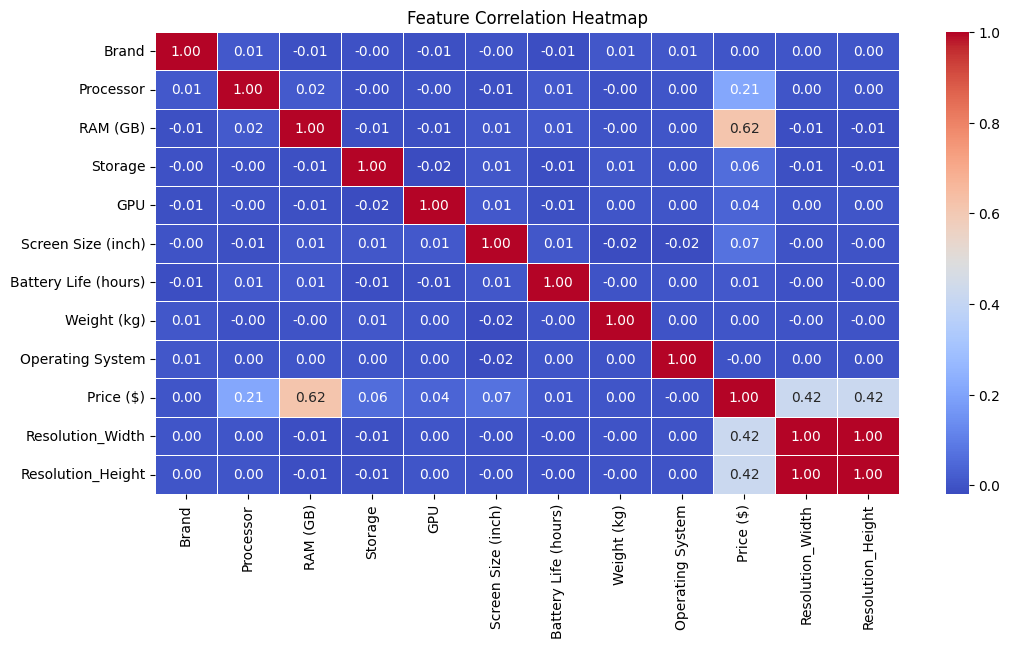

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation with Price
print(correlation_matrix["Price ($)"].sort_values(ascending=False))

# Visualize with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


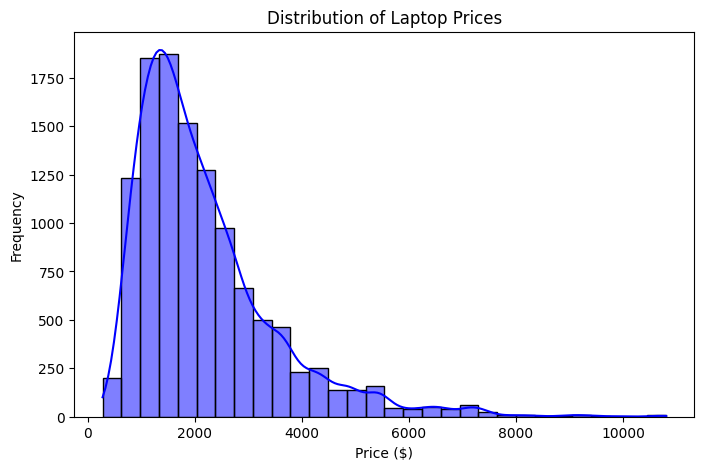

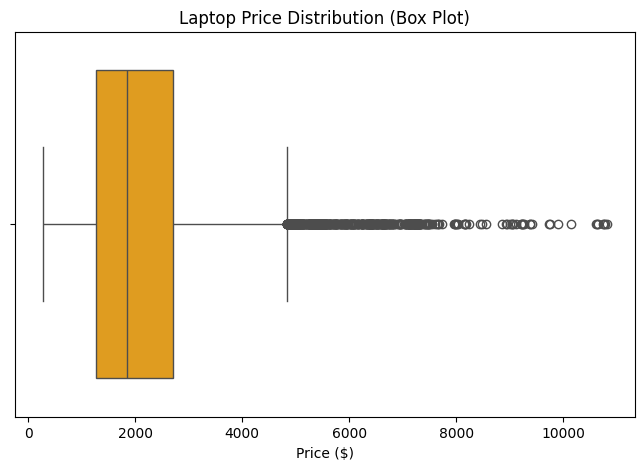

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Price ($)"], bins=30, kde=True, color="blue")
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

# Box Plot to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Price ($)"], color="orange")
plt.title("Laptop Price Distribution (Box Plot)")
plt.xlabel("Price ($)")
plt.show()


<ipython-input-18-acb342c554d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_processor.index, y=avg_price_by_processor.values, palette="viridis")


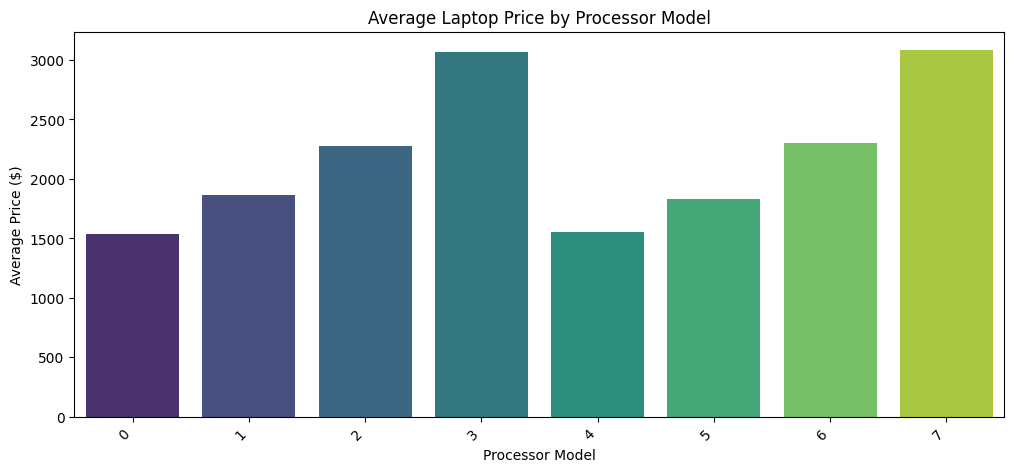

In [18]:
# Group by Processor and calculate the average price
avg_price_by_processor = df.groupby("Processor")["Price ($)"].mean().sort_values()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=avg_price_by_processor.index, y=avg_price_by_processor.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Average Laptop Price by Processor Model")
plt.xlabel("Processor Model")
plt.ylabel("Average Price ($)")
plt.show()


In [19]:
# Group by Processor and calculate the average price
avg_price_by_processor = df.groupby("Processor")["Price ($)"].mean().sort_values(ascending=False)

# Display the result
print(avg_price_by_processor)


Processor
7    3084.511834
3    3067.286753
6    2300.938979
2    2277.774418
1    1862.017925
5    1829.125983
4    1555.673013
0    1534.919567
Name: Price ($), dtype: float64


<ipython-input-20-9afb0b9df940>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_processor.index, y=avg_price_by_processor.values, palette="viridis")


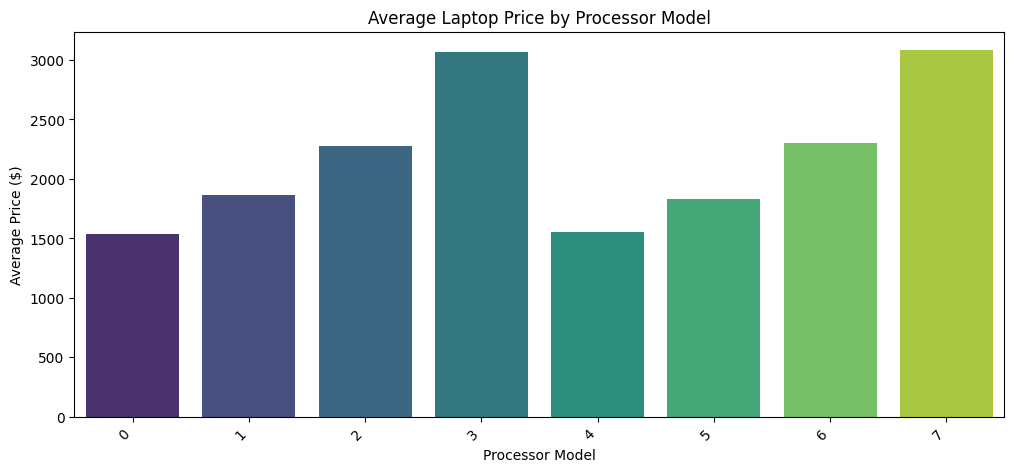

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=avg_price_by_processor.index, y=avg_price_by_processor.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Average Laptop Price by Processor Model")
plt.xlabel("Processor Model")
plt.ylabel("Average Price ($)")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Price ($)"])  # Drop target column
y = df["Price ($)"]  # Target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (9414, 11), Testing set: (2354, 11)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  # Root Mean Squared Error
    return r2, mae, mse, rmse

# Evaluate each model
models = {"Linear Regression": lr_model, "Decision Tree": dt_model, "Random Forest": rf_model}

for name, model in models.items():
    r2, mae, mse, rmse = evaluate_model(model, X_test, y_test)
    print(f"📊 {name} Performance:")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - MAE: {mae:.2f}")
    print(f"  - MSE: {mse:.2f}")
    print(f"  - RMSE: {rmse:.2f}\n")


📊 Linear Regression Performance:
  - R² Score: 0.6136
  - MAE: 599.40
  - MSE: 684714.93
  - RMSE: 827.48

📊 Decision Tree Performance:
  - R² Score: 0.7872
  - MAE: 390.80
  - MSE: 377065.52
  - RMSE: 614.06

📊 Random Forest Performance:
  - R² Score: 0.8857
  - MAE: 306.76
  - MSE: 202618.47
  - RMSE: 450.13

